#D7041E Applied artificial intelligence (Lab1, Task 2.1 & 2.2)
Nazrul Islam & Srinivas Bobba (Group 6)

In [ ]:
import numpy as np
from statistics import mode
from collections import Counter
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import KFold

Below code is already provided

11490434/11490434 [==============================] - 0s 0us/step


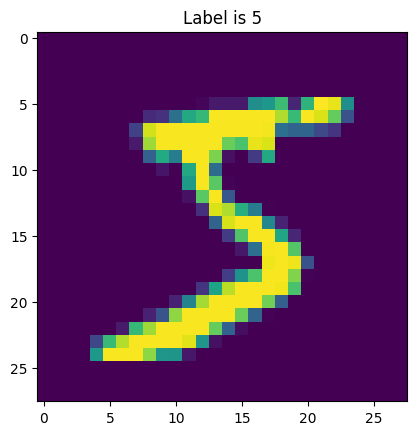

In [ ]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()

<ipython-input-3-29efb6253963>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0=plt.subplot(2,2,1)
<ipython-input-3-29efb6253963>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(2,2,2)


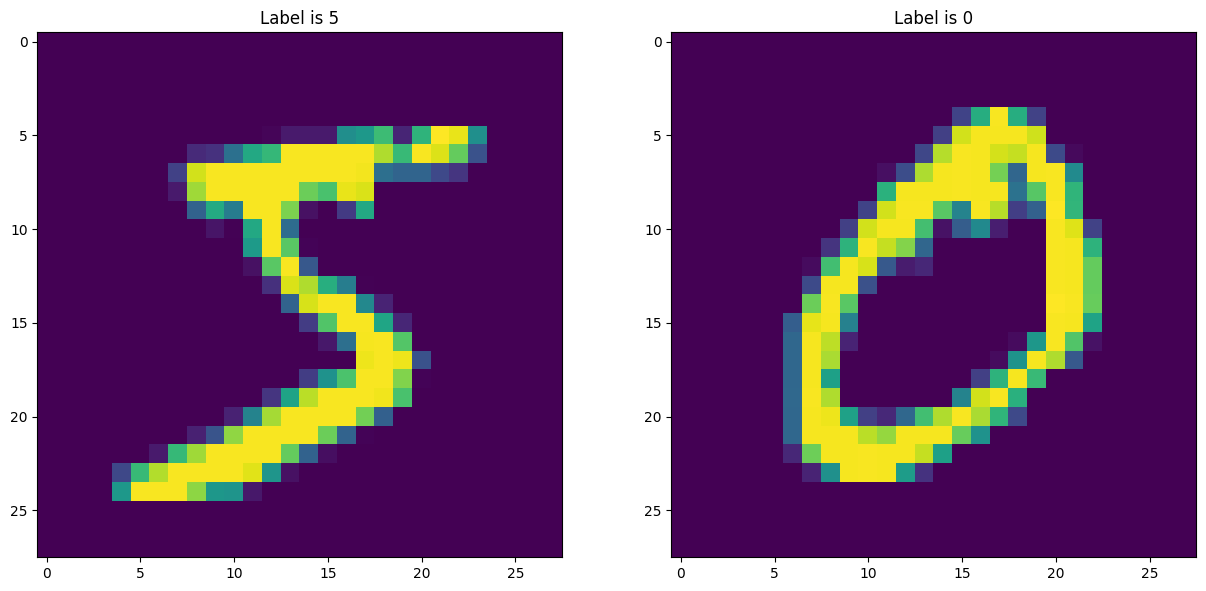

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()

In [ ]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int) # here is bug that we have fixed.
Tr_set.shape

(500, 784)

In [ ]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [ ]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])

##Task 2.1

(*Point 1*) When we run the code as is, we get accuracy of **0.2649** as in the code below .

In [ ]:
Labels_predicted=predict(Test_images)
print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.2649


(*Point 3*) As we fixed the bug (.astype(int)) in above code, the accuracy is much higher which is **0.811**

In [ ]:
Labels_predicted=predict(Test_images)
print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.811


(*Point 2*) We have created based on the predict() function in the given code. We have mode the distance equation to calculate the square root of the sum of the squared vector values. (line 7 below)

In [ ]:
def predict_l2norm(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(np.abs(Tr_set-X[i,:])),axis=1))

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

We tried to the accuracy of the prediction using both the code without fixing bug and after fixing the bug. We get the accuracies as below. (**0.19** and **0.8294**)

In [ ]:
Labels_predicted=predict_l2norm(Test_images)
print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.19


In [ ]:
Labels_predicted=predict_l2norm(Test_images)
print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.8294


(*Point 4*)
The function below is an extension from the code above that accepts an additional parameter value of K, so that it finds k closest images and vote on the label of the test image.

In [ ]:
def predict_knn(X,k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        min_index= np.argsort(distances)[:k]
        Lpred[i]=mode(Ltr_set[min_index])
    return Lpred

In [ ]:
#using K=1
Labels_predicted_k = predict_knn(Test_images, 1)
print("Accuracy:", np.mean(Labels_predicted_k==L_test))

Accuracy: 0.811


In [ ]:
#using K=3
Labels_predicted_k = predict_knn(Test_images, 3)
print("Accuracy:", np.mean(Labels_predicted_k==L_test))

Accuracy: 0.8003


##Task 2.2 Hyperparameters, cross-validation

(*Point 1*) In the below function, we extended the function above accept separate train and validation data as parameters.

In [ ]:
def predict_knn_crossval(val_data,train_data,train_label,k):
    num_test=val_data.shape[0]

    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.square(np.abs(train_data-val_data[i,:])),axis=1))

        k_closest = np.argsort(distances)[:k]

        Lpred[i]=mode(train_label[k_closest])
    return Lpred

We created these functions using the given code above, so that we can call it within a loop

In [ ]:
def shuffled_copies(a, b):
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

In [ ]:
def randomize_data():
    num_sample=500
    random_train_data, random_label_data = shuffled_copies(Xtr,Ltr)
    Tr_set_random=random_train_data[:num_sample,:,:]
    Ltr_set_random=random_label_data[:num_sample]
    #Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

    Tr_set_random=Tr_set_random.reshape(num_sample,Tr_set_random.shape[1]*Tr_set_random.shape[2]).astype(int)
    Tr_set_random.shape
    return Tr_set_random, Ltr_set_random

We created this function to run the cross validations.

In [ ]:
def cross_validation(train_data, train_label, fold):

    kfold = KFold(n_splits=fold)
    ac = []
    k_ac = []

    for k in range(1,10):
        for train, val in kfold.split(train_data):
            train_set = train_data[train]
            val_set = train_data[val]

            train_label_set = train_label[train]
            val_label_set = train_label[val]

            label_predict = predict_knn_crossval(val_set, train_set, train_label_set, k)
            ac.append(np.mean(label_predict==val_label_set))

        ac_mean = np.mean(ac)
        k_ac.append(ac_mean)

    return(k_ac)

Here's the actual execution of the fuctions we have created to far that runs over a loop, to get the best value of k.

In [ ]:
best_k_value = []
fold = 3
for i in range(1,20):
    T_Data,L_data = randomize_data()
    k_ac=cross_validation(T_Data,L_data,fold)
    best_k_value.append(np.argmax(k_ac)+1)

print(best_k_value)

[4, 1, 1, 3, 1, 5, 1, 3, 1, 1, 1, 1, 6, 1, 1, 4, 6, 1, 1]


(*Point 2*) Now, we will find which k value is more frequent, meanings that that's the best one we need to use.

In [ ]:
value = Counter(best_k_value)
value.most_common(1)[0][0]
print( value.most_common(1)[0][0])

1


In [ ]:
acc_value = predict_knn(Test_images, value.most_common(1)[0][0])
print('The best K value is ',value.most_common(1)[0][0], ", which is the acc value" , np.mean(acc_value==L_test))

The best K value is  1 , which is the acc value 0.811
